label        19
pixel1      173
pixel2      174
pixel3      176
pixel4      177
           ... 
pixel780    197
pixel781    195
pixel782    195
pixel783    193
pixel784    190
Name: 16, Length: 785, dtype: int64


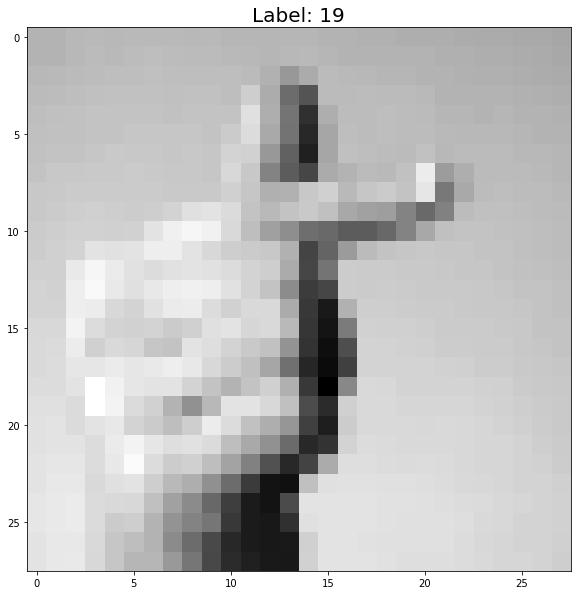

C:\Users\nguye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


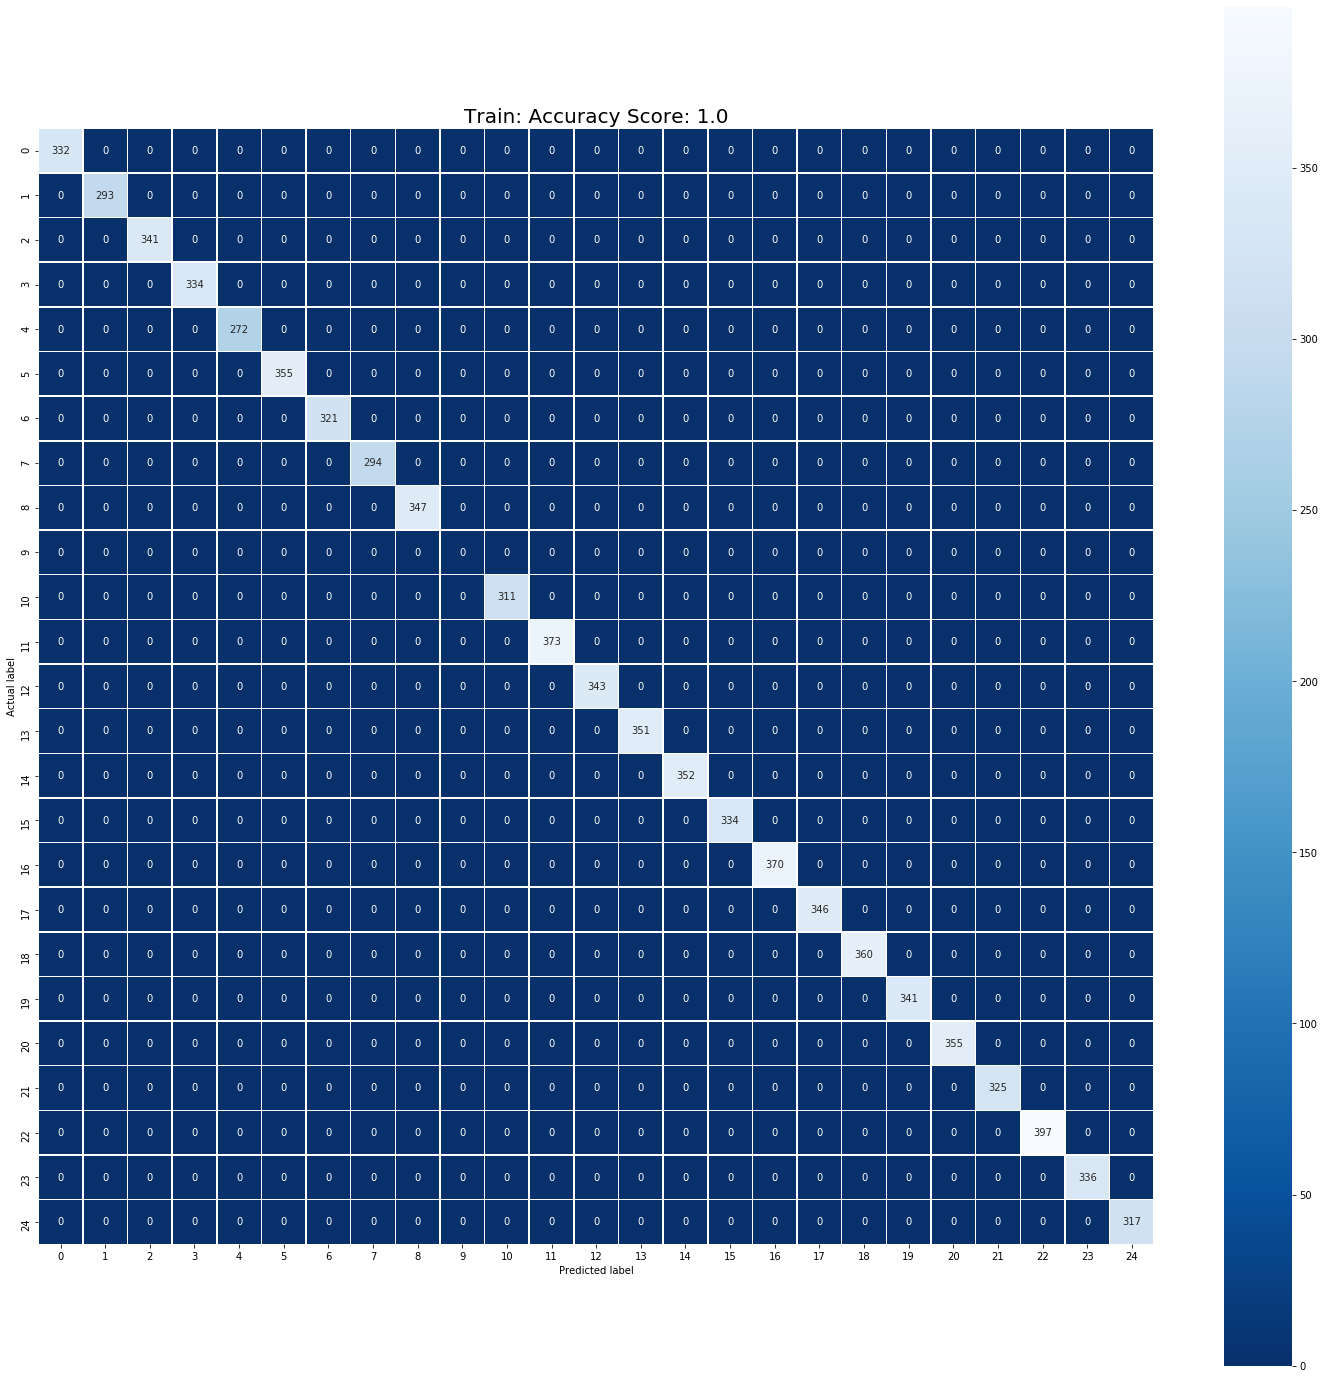

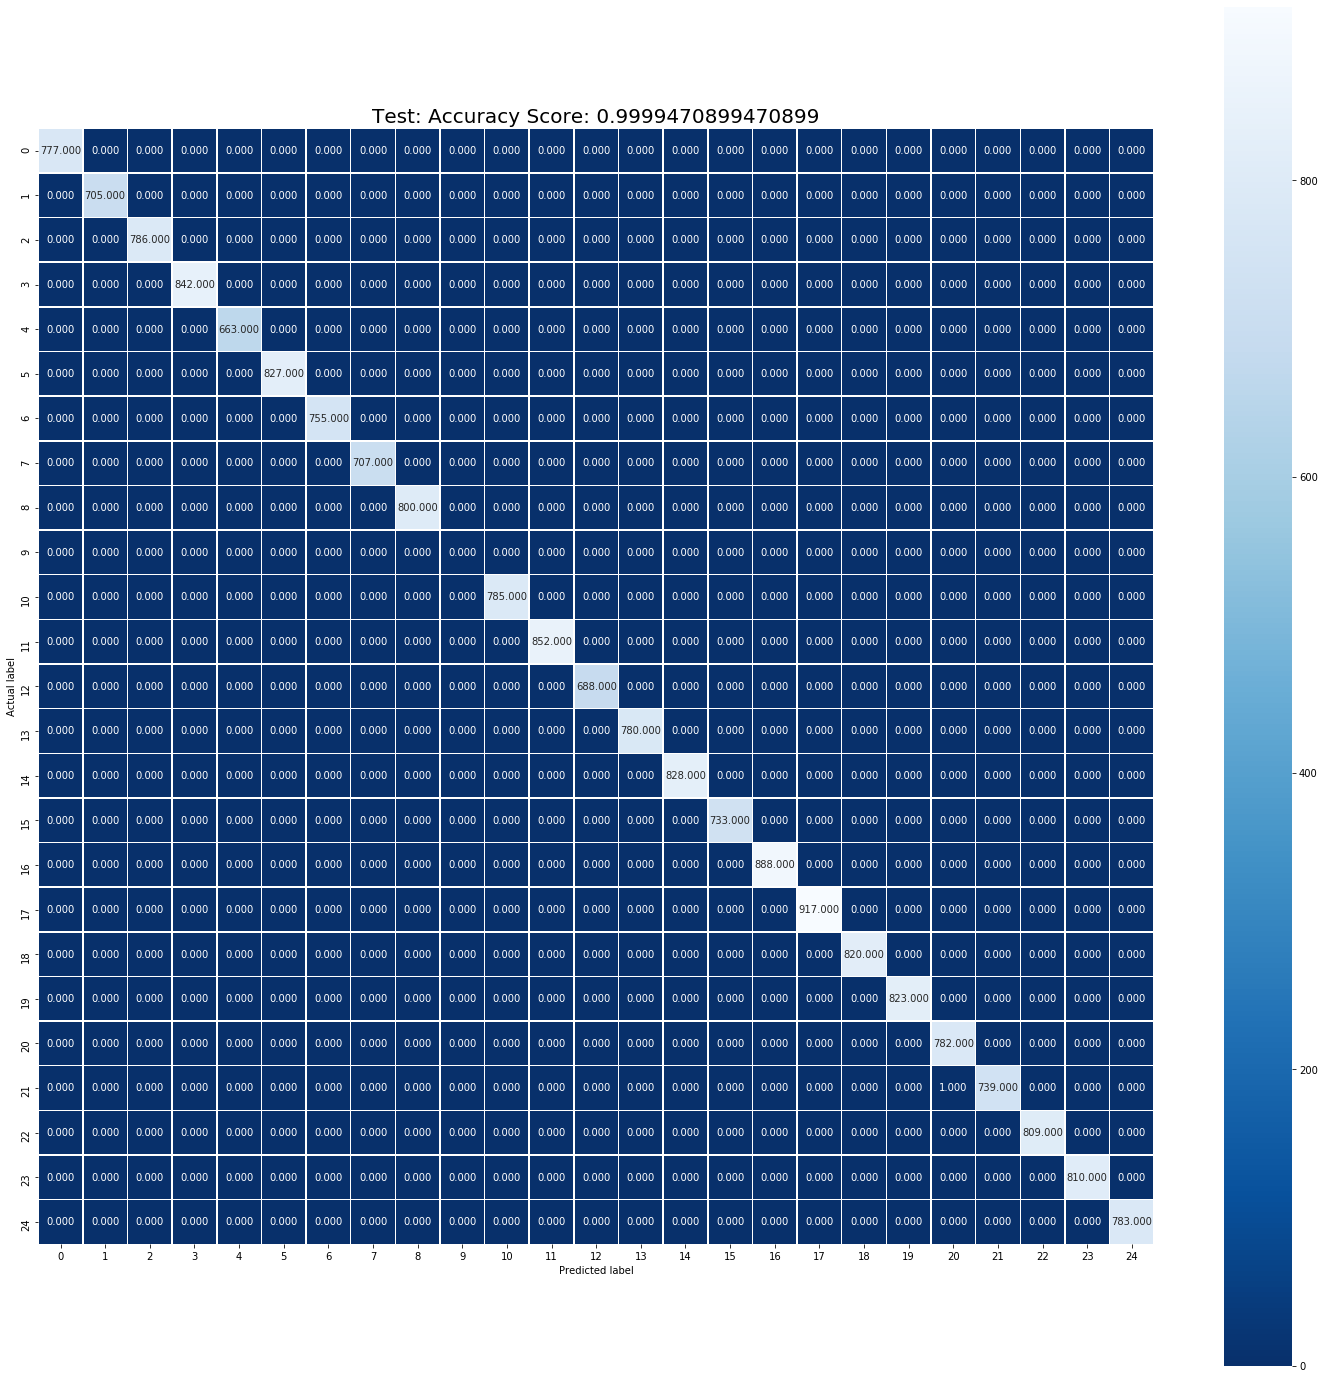

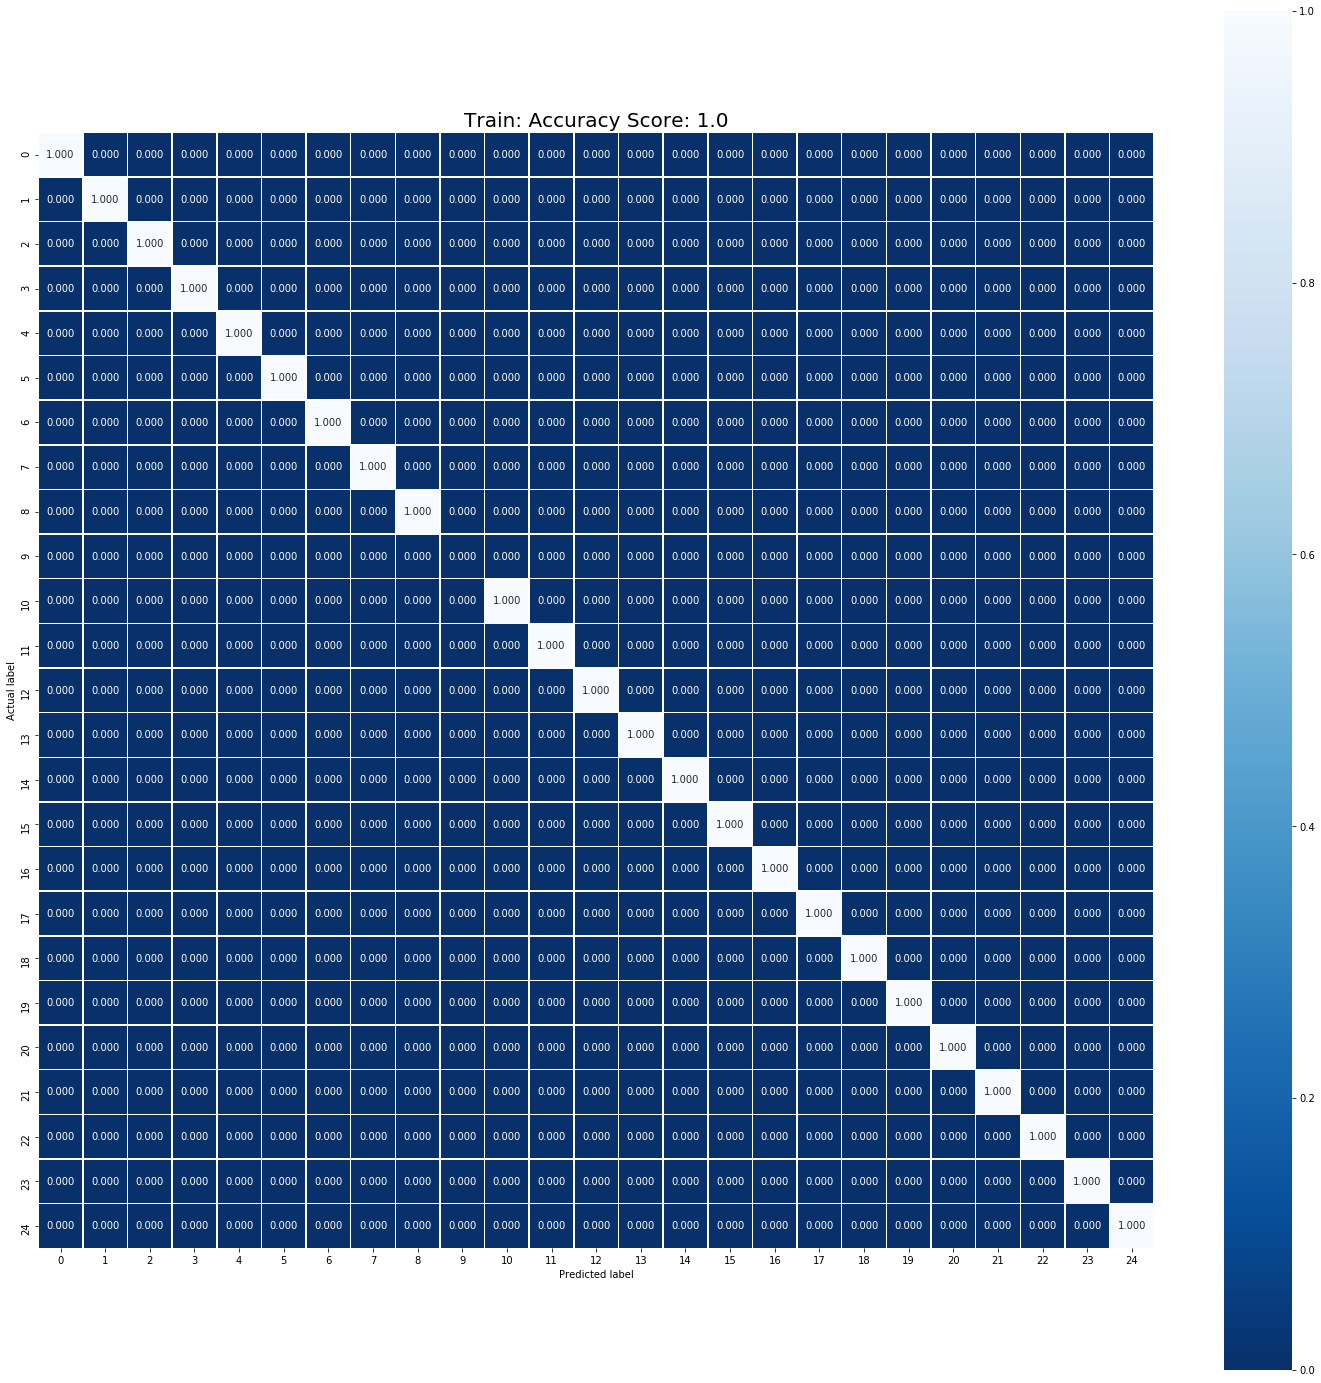

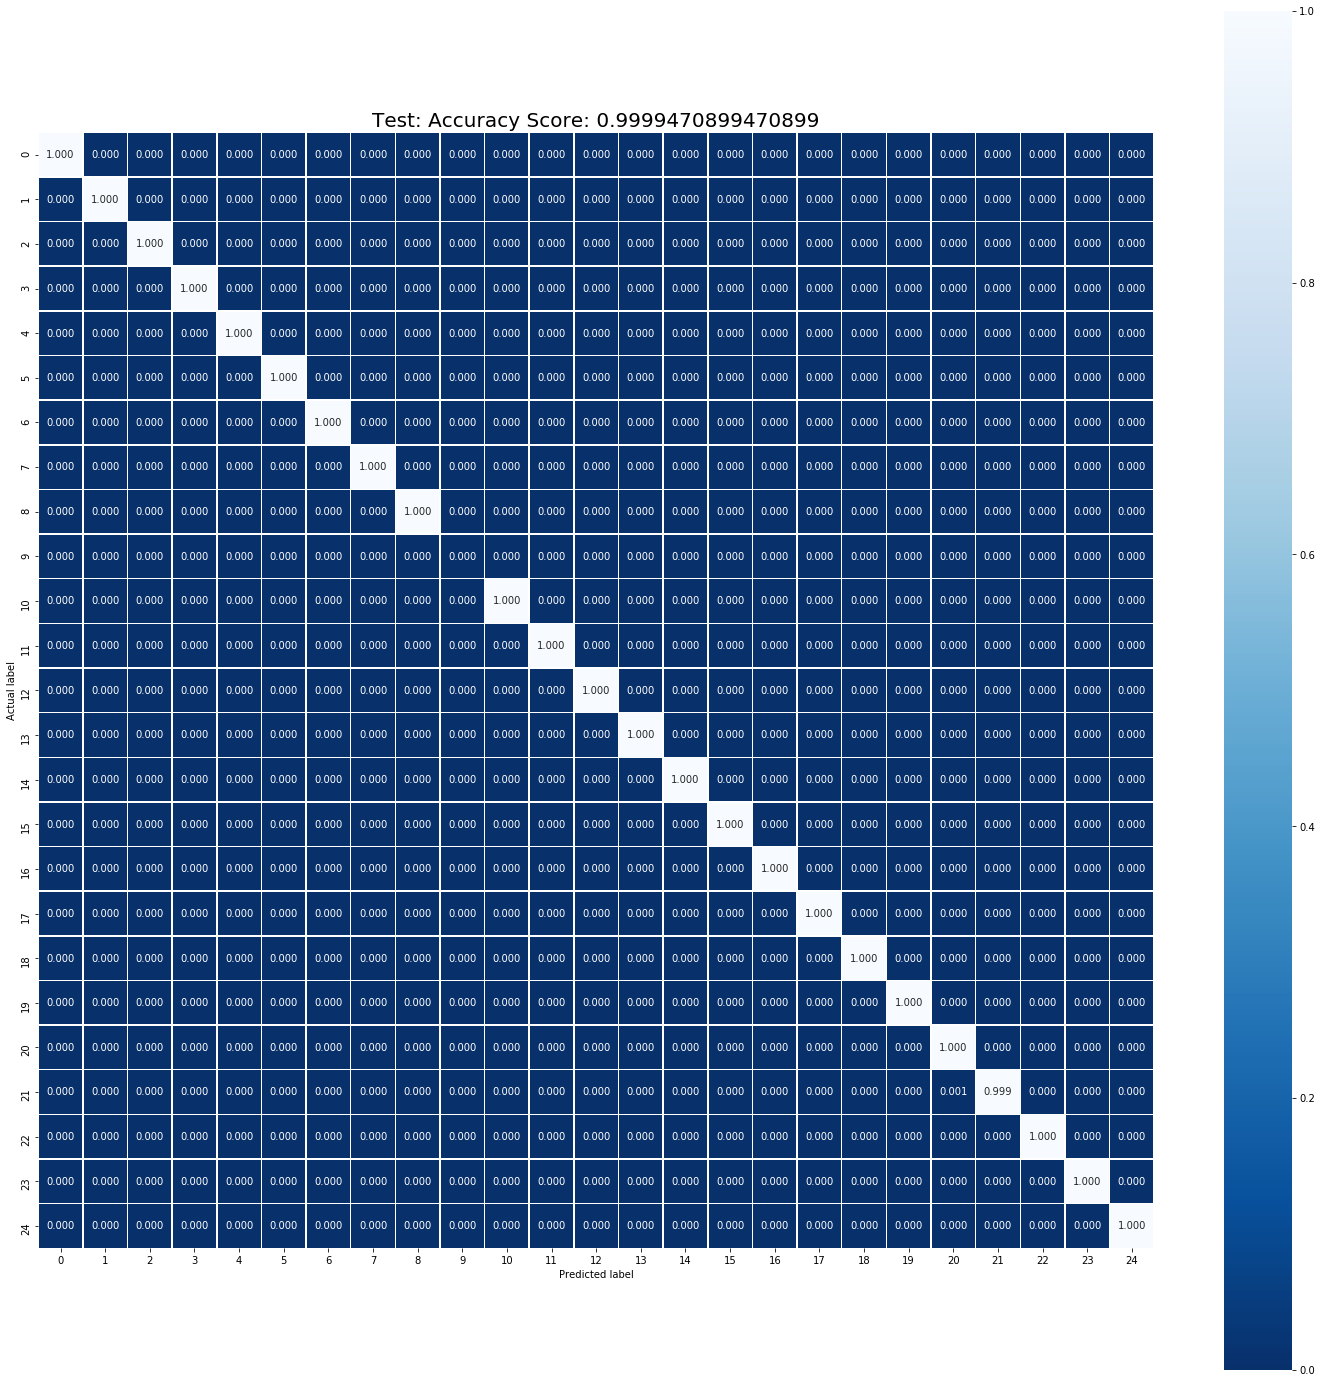

In [17]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn
import seaborn as sns
from sklearn import metrics


data = pd.read_csv('train.csv')
max_label = max(data.label.values)

def ShowImage(data, index):
    print(data.iloc[index])
    label = data['label'].iloc[index]
    pictures = data.drop(['label'], axis = 1)
    picture = pictures.iloc[index].values.reshape(28, 28)

    plt.figure( figsize = (10, 10))
    plt.imshow(picture, cmap = plt.cm.gray)
    
    title = 'Label: ' + str(label)
    plt.title(title, size = 20)
    plt.show()
    
ShowImage(data, 16)

Y = data.label
X = data.drop(['label'], axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7, random_state=42)


regression = LogisticRegression(solver = 'lbfgs', max_iter = 1000)

regression.fit(X_train, Y_train)
Y_train_pred = regression.predict(X_train)
Y_test_pred = regression.predict(X_test)

score_train = regression.score(X_train, Y_train)
score_test = regression.score(X_test, Y_test)

cm_train = metrics.confusion_matrix(Y_train, Y_train_pred, labels=range(0, max_label + 1, 1))
cm_test = metrics.confusion_matrix(Y_test, Y_test_pred, labels=range(0, max_label + 1, 1))

plt.figure(figsize=(25,25))
sns.heatmap(cm_train, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Train: Accuracy Score: ' + str(score_train)
plt.title(all_sample_title, size = 20);
plt.show()

plt.figure(figsize=(25,25))
sns.heatmap(cm_test, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test: Accuracy Score: ' + str(score_test)
plt.title(all_sample_title, size = 20);
plt.show()


###############################################################################################


cm_train = metrics.confusion_matrix(Y_train, Y_train_pred, labels=range(0, max_label + 1, 1), normalize = 'true')
cm_test = metrics.confusion_matrix(Y_test, Y_test_pred, labels=range(0, max_label + 1, 1), normalize = 'true')

plt.figure(figsize=(25,25))
sns.heatmap(cm_train, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Train: Accuracy Score: ' + str(score_train)
plt.title(all_sample_title, size = 20);
plt.show()

plt.figure(figsize=(25,25))
sns.heatmap(cm_test, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test: Accuracy Score: ' + str(score_test)
plt.title(all_sample_title, size = 20);
plt.show()